In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# DataSet 2011

In [490]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2011.csv")
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2011-11-01 01:00:00,NaN,1.0,NaN,NaN,154.0,84.0,NaN,NaN,NaN,6.0,NaN,NaN,28079004
1,2011-11-01 01:00:00,2.5,0.4,3.5,0.26,68.0,92.0,3.0,40.0,24.0,9.0,1.54,8.7,28079008
2,2011-11-01 01:00:00,2.9,NaN,3.8,NaN,96.0,99.0,NaN,NaN,NaN,NaN,NaN,7.2,28079011
3,2011-11-01 01:00:00,NaN,0.6,NaN,NaN,60.0,83.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2011-11-01 01:00:00,NaN,NaN,NaN,NaN,44.0,62.0,3.0,NaN,NaN,3.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209923,2011-09-01 00:00:00,NaN,0.2,NaN,NaN,5.0,19.0,44.0,NaN,NaN,NaN,NaN,NaN,28079056
209924,2011-09-01 00:00:00,NaN,0.1,NaN,NaN,6.0,29.0,NaN,11.0,NaN,7.0,NaN,NaN,28079057
209925,2011-09-01 00:00:00,NaN,NaN,NaN,0.23,1.0,21.0,28.0,NaN,NaN,NaN,1.44,NaN,28079058
209926,2011-09-01 00:00:00,NaN,NaN,NaN,NaN,3.0,15.0,48.0,NaN,NaN,NaN,NaN,NaN,28079059


In [491]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209928 entries, 0 to 209927
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     209928 non-null  object 
 1   BEN      51393 non-null   float64
 2   CO       87127 non-null   float64
 3   EBE      51350 non-null   float64
 4   NMHC     43517 non-null   float64
 5   NO       208954 non-null  float64
 6   NO_2     208973 non-null  float64
 7   O_3      122049 non-null  float64
 8   PM10     103743 non-null  float64
 9   PM25     51079 non-null   float64
 10  SO_2     87131 non-null   float64
 11  TCH      43519 non-null   float64
 12  TOL      51175 non-null   float64
 13  station  209928 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 22.4+ MB


In [492]:
b=a.iloc[:,1:17]
b

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,NaN,1.0,NaN,NaN,154.0,84.0,NaN,NaN,NaN,6.0,NaN,NaN,28079004
1,2.5,0.4,3.5,0.26,68.0,92.0,3.0,40.0,24.0,9.0,1.54,8.7,28079008
2,2.9,NaN,3.8,NaN,96.0,99.0,NaN,NaN,NaN,NaN,NaN,7.2,28079011
3,NaN,0.6,NaN,NaN,60.0,83.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,NaN,NaN,NaN,NaN,44.0,62.0,3.0,NaN,NaN,3.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209923,NaN,0.2,NaN,NaN,5.0,19.0,44.0,NaN,NaN,NaN,NaN,NaN,28079056
209924,NaN,0.1,NaN,NaN,6.0,29.0,NaN,11.0,NaN,7.0,NaN,NaN,28079057
209925,NaN,NaN,NaN,0.23,1.0,21.0,28.0,NaN,NaN,NaN,1.44,NaN,28079058
209926,NaN,NaN,NaN,NaN,3.0,15.0,48.0,NaN,NaN,NaN,NaN,NaN,28079059


In [493]:
c=b.fillna(value=10)
c

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,10.0,1.0,10.0,10.00,154.0,84.0,10.0,10.0,10.0,6.0,10.00,10.0,28079004
1,2.5,0.4,3.5,0.26,68.0,92.0,3.0,40.0,24.0,9.0,1.54,8.7,28079008
2,2.9,10.0,3.8,10.00,96.0,99.0,10.0,10.0,10.0,10.0,10.00,7.2,28079011
3,10.0,0.6,10.0,10.00,60.0,83.0,2.0,10.0,10.0,10.0,10.00,10.0,28079016
4,10.0,10.0,10.0,10.00,44.0,62.0,3.0,10.0,10.0,3.0,10.00,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209923,10.0,0.2,10.0,10.00,5.0,19.0,44.0,10.0,10.0,10.0,10.00,10.0,28079056
209924,10.0,0.1,10.0,10.00,6.0,29.0,10.0,11.0,10.0,7.0,10.00,10.0,28079057
209925,10.0,10.0,10.0,0.23,1.0,21.0,28.0,10.0,10.0,10.0,1.44,10.0,28079058
209926,10.0,10.0,10.0,10.00,3.0,15.0,48.0,10.0,10.0,10.0,10.00,10.0,28079059


In [494]:
d=c.head(10000)
d

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,10.0,1.0,10.0,10.00,154.0,84.0,10.0,10.0,10.0,6.0,10.00,10.0,28079004
1,2.5,0.4,3.5,0.26,68.0,92.0,3.0,40.0,24.0,9.0,1.54,8.7,28079008
2,2.9,10.0,3.8,10.00,96.0,99.0,10.0,10.0,10.0,10.0,10.00,7.2,28079011
3,10.0,0.6,10.0,10.00,60.0,83.0,2.0,10.0,10.0,10.0,10.00,10.0,28079016
4,10.0,10.0,10.0,10.00,44.0,62.0,3.0,10.0,10.0,3.0,10.00,10.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,0.4,10.0,10.00,27.0,71.0,10.0,10.0,10.0,10.0,10.00,10.0,28079039
9996,10.0,10.0,10.0,10.00,46.0,82.0,10.0,31.0,10.0,3.0,10.00,10.0,28079040
9997,10.0,10.0,10.0,10.00,58.0,91.0,10.0,37.0,17.0,10.0,10.00,10.0,28079047
9998,10.0,10.0,10.0,10.00,8.0,59.0,10.0,23.0,13.0,10.0,10.00,10.0,28079048


In [495]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BEN      10000 non-null  float64
 1   CO       10000 non-null  float64
 2   EBE      10000 non-null  float64
 3   NMHC     10000 non-null  float64
 4   NO       10000 non-null  float64
 5   NO_2     10000 non-null  float64
 6   O_3      10000 non-null  float64
 7   PM10     10000 non-null  float64
 8   PM25     10000 non-null  float64
 9   SO_2     10000 non-null  float64
 10  TCH      10000 non-null  float64
 11  TOL      10000 non-null  float64
 12  station  10000 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1015.8 KB


In [496]:
x=d.iloc[:,0:5]
y=d.iloc[:,-1]

In [497]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [498]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [499]:
print(lr.intercept_)

28079018.559473023


In [500]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-2.461517
CO,1.402755
EBE,4.025182
NMHC,-0.103901
NO,-0.023969


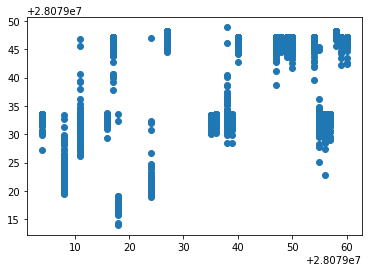

In [501]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [502]:
# Score

print(lr.score(x_test,y_test))

0.29545031129590904


In [503]:
print(lr.score(x_train,y_train))

0.2766754077272333


In [504]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [505]:
#Ridge Score
rr.score(x_test,y_test)

0.29543965652546866

In [506]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [507]:
# Lasso Score
la.score(x_test,y_test)

0.2545291082466363

In [508]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [509]:
print(en.coef_)

[ 0.45779588  1.32153442  1.01721551 -0.10063264 -0.02292181]


In [510]:
print(en.intercept_)

28079019.784507148


In [511]:
print(en.predict(x_test))

[28079046.72071711 28079021.0580686  28079030.27084488 ...
 28079031.89885656 28079033.37463162 28079047.30114501]


In [512]:
print(en.score(x_test,y_test))

0.2920319622813293


In [513]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [514]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [515]:
observation=[[51,62,73,85,96]]
prediction=logr.predict(observation)

In [516]:
print(prediction)

[28079050]


In [517]:
logr.classes_

array([28079004, 28079008, 28079011, 28079016, 28079017, 28079018,
       28079024, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079047, 28079048, 28079049, 28079050, 28079054,
       28079055, 28079056, 28079057, 28079058, 28079059, 28079060],
      dtype=int64)

In [518]:
logr.predict_proba(observation)[0][0]

4.5508254518115005e-180

In [525]:
print(logr.score(x_test,y_test))

0.14333333333333334


In [519]:
#Random Forest
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [520]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,6,7,8,9],
           'n_estimators':[12,11,10,5,9]}

In [521]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'n_estimators': [12, 11, 10, 5, 9]},
             scoring='accuracy')

In [522]:
grid_search.best_score_

0.457

In [523]:
rfc_best=grid_search.best_estimator_

[Text(2080.875, 1494.8999999999999, 'X[1] <= 6.05\ngini = 0.958\nsamples = 4450\nvalue = [307, 286, 322, 307, 334, 253, 269, 276, 286, 301\n296, 297, 314, 263, 325, 264, 289, 287, 273, 288\n266, 289, 309, 299]'),
 Text(1255.5, 1223.1, 'X[3] <= 5.245\ngini = 0.9\nsamples = 1831\nvalue = [307, 286, 0, 307, 0, 253, 269, 0, 286, 301, 0\n297, 0, 0, 0, 0, 0, 0, 0, 288, 266, 0, 0, 0]'),
 Text(744.0, 951.3, 'X[3] <= 0.125\ngini = 0.5\nsamples = 371\nvalue = [0, 284, 0, 0, 0, 0, 269, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(372.0, 679.4999999999999, 'X[2] <= 0.85\ngini = 0.332\nsamples = 114\nvalue = [0, 34, 0, 0, 0, 0, 128, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(186.0, 407.6999999999998, 'X[2] <= 0.55\ngini = 0.236\nsamples = 58\nvalue = [0, 12, 0, 0, 0, 0, 76, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(93.0, 135.89999999999986, 'gini = 0.375\nsamples = 11\nvalue = [0, 4, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

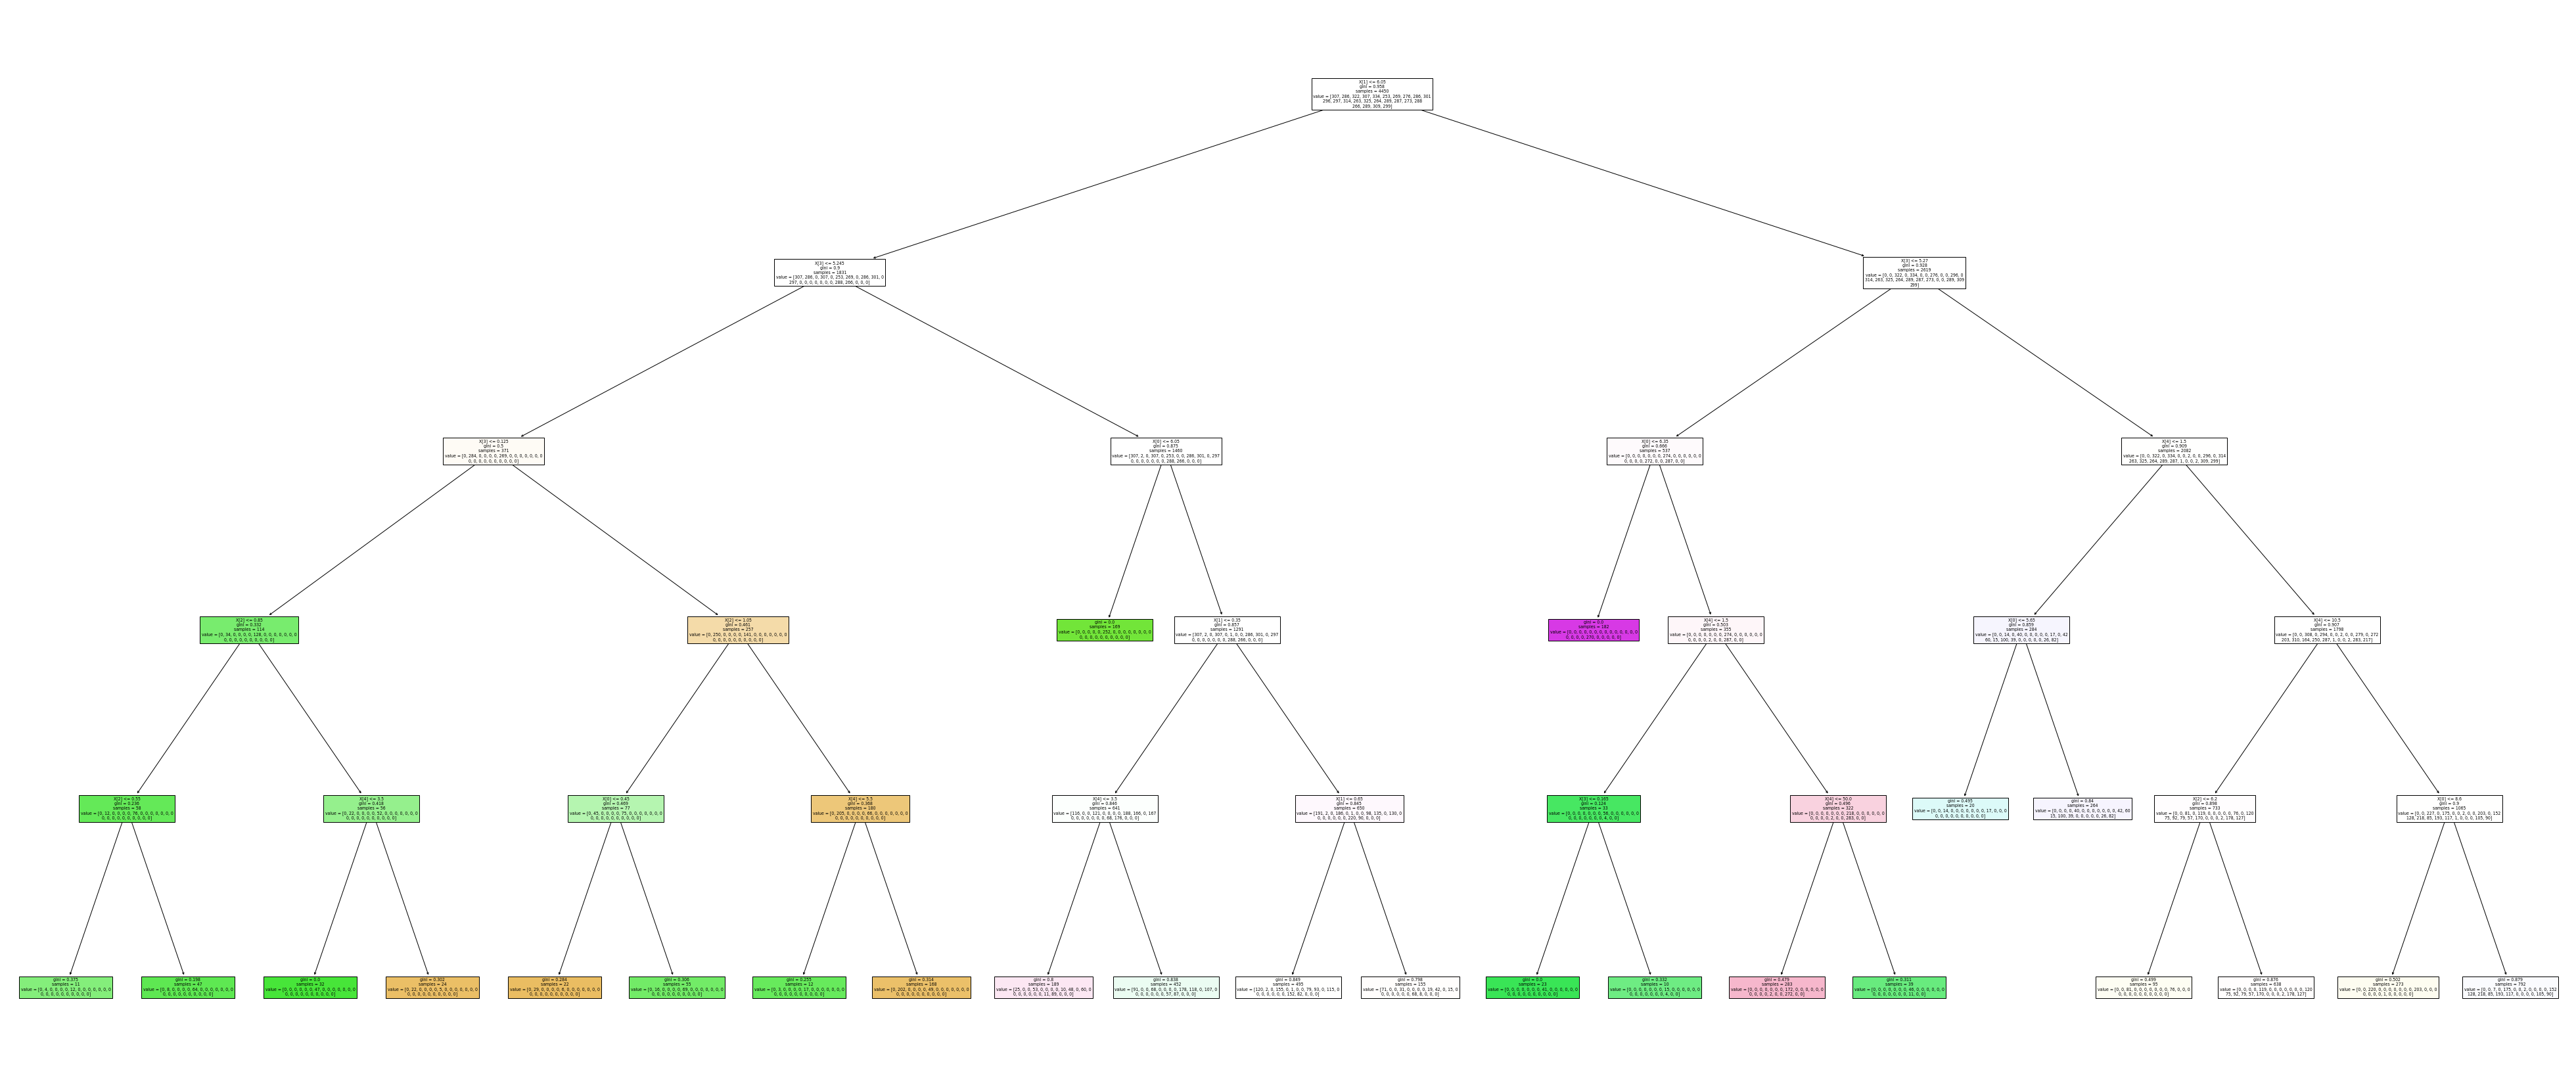

In [524]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion:RandomForest has Highest accuracy.RandomForest Score=0.457

# DataSet 2012

In [526]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2012.csv")
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2012-09-01 01:00:00,NaN,0.2,NaN,NaN,7.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,28079004
1,2012-09-01 01:00:00,0.3,0.3,0.7,NaN,3.0,18.0,55.0,10.0,9.0,1.0,NaN,2.4,28079008
2,2012-09-01 01:00:00,0.4,NaN,0.7,NaN,2.0,10.0,NaN,NaN,NaN,NaN,NaN,1.5,28079011
3,2012-09-01 01:00:00,NaN,0.2,NaN,NaN,1.0,6.0,50.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2012-09-01 01:00:00,NaN,NaN,NaN,NaN,1.0,13.0,54.0,NaN,NaN,3.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210715,2012-03-01 00:00:00,NaN,0.6,NaN,NaN,37.0,84.0,14.0,NaN,NaN,NaN,NaN,NaN,28079056
210716,2012-03-01 00:00:00,NaN,0.4,NaN,NaN,5.0,76.0,NaN,17.0,NaN,7.0,NaN,NaN,28079057
210717,2012-03-01 00:00:00,NaN,NaN,NaN,0.34,3.0,41.0,24.0,NaN,NaN,NaN,1.34,NaN,28079058
210718,2012-03-01 00:00:00,NaN,NaN,NaN,NaN,2.0,44.0,36.0,NaN,NaN,NaN,NaN,NaN,28079059


In [527]:
a=a.head(150000)
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2012-09-01 01:00:00,NaN,0.2,NaN,NaN,7.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,28079004
1,2012-09-01 01:00:00,0.3,0.3,0.7,NaN,3.0,18.0,55.0,10.0,9.0,1.0,NaN,2.4,28079008
2,2012-09-01 01:00:00,0.4,NaN,0.7,NaN,2.0,10.0,NaN,NaN,NaN,NaN,NaN,1.5,28079011
3,2012-09-01 01:00:00,NaN,0.2,NaN,NaN,1.0,6.0,50.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2012-09-01 01:00:00,NaN,NaN,NaN,NaN,1.0,13.0,54.0,NaN,NaN,3.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2012-12-16 12:00:00,NaN,0.1,NaN,NaN,8.0,24.0,41.0,NaN,NaN,NaN,NaN,NaN,28079056
149996,2012-12-16 12:00:00,NaN,0.3,NaN,NaN,6.0,22.0,NaN,21.0,NaN,5.0,NaN,NaN,28079057
149997,2012-12-16 12:00:00,NaN,NaN,NaN,NaN,2.0,5.0,52.0,NaN,NaN,NaN,NaN,NaN,28079058
149998,2012-12-16 12:00:00,NaN,NaN,NaN,NaN,4.0,11.0,75.0,NaN,NaN,NaN,NaN,NaN,28079059


In [528]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     150000 non-null  object 
 1   BEN      36683 non-null   float64
 2   CO       62198 non-null   float64
 3   EBE      36655 non-null   float64
 4   NMHC     21919 non-null   float64
 5   NO       149474 non-null  float64
 6   NO_2     149475 non-null  float64
 7   O_3      87181 non-null   float64
 8   PM10     74620 non-null   float64
 9   PM25     37117 non-null   float64
 10  SO_2     62209 non-null   float64
 11  TCH      21919 non-null   float64
 12  TOL      36593 non-null   float64
 13  station  150000 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 16.0+ MB


In [529]:
b=a.dropna()
b

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
6,2012-09-01 01:00:00,0.4,0.2,0.8,0.24,1.0,7.0,57.0,11.0,7.0,2.0,1.33,0.6,28079024
30,2012-09-01 02:00:00,0.4,0.2,0.7,0.24,1.0,5.0,55.0,5.0,5.0,2.0,1.33,0.5,28079024
54,2012-09-01 03:00:00,0.4,0.2,0.7,0.24,1.0,4.0,56.0,6.0,4.0,2.0,1.33,0.5,28079024
78,2012-09-01 04:00:00,0.3,0.2,0.7,0.25,1.0,5.0,54.0,6.0,5.0,2.0,1.34,0.4,28079024
102,2012-09-01 05:00:00,0.4,0.2,0.7,0.24,1.0,3.0,53.0,8.0,5.0,2.0,1.33,0.5,28079024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149886,2012-12-16 08:00:00,0.2,0.2,0.7,0.22,1.0,4.0,48.0,9.0,5.0,1.0,1.32,0.3,28079024
149910,2012-12-16 09:00:00,0.4,0.2,0.6,0.22,1.0,4.0,47.0,7.0,4.0,1.0,1.32,0.4,28079024
149934,2012-12-16 10:00:00,0.3,0.2,0.5,0.22,1.0,3.0,53.0,12.0,6.0,1.0,1.31,0.3,28079024
149958,2012-12-16 11:00:00,0.3,0.2,0.6,0.22,1.0,5.0,53.0,6.0,5.0,1.0,1.31,0.3,28079024


In [530]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7956 entries, 6 to 149982
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7956 non-null   object 
 1   BEN      7956 non-null   float64
 2   CO       7956 non-null   float64
 3   EBE      7956 non-null   float64
 4   NMHC     7956 non-null   float64
 5   NO       7956 non-null   float64
 6   NO_2     7956 non-null   float64
 7   O_3      7956 non-null   float64
 8   PM10     7956 non-null   float64
 9   PM25     7956 non-null   float64
 10  SO_2     7956 non-null   float64
 11  TCH      7956 non-null   float64
 12  TOL      7956 non-null   float64
 13  station  7956 non-null   int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 932.3+ KB


In [531]:
x=b.iloc[:,1:11]
y=b.iloc[:,-1]

In [532]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [533]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [534]:
print(lr.intercept_)

28079019.70392434


In [535]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,1.633244
CO,21.871156
EBE,-1.860104
NMHC,26.317182
NO,-0.035769
NO_2,-0.178530
O_3,-0.041600
PM10,0.008049
PM25,-0.086228
SO_2,-0.614785


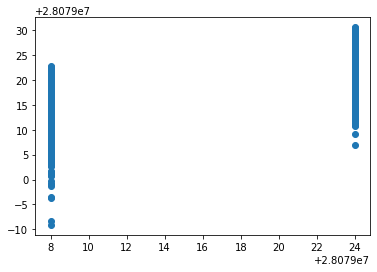

In [536]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [537]:
# Score

print(lr.score(x_test,y_test))

0.5096206187701979


In [538]:
print(lr.score(x_train,y_train))

0.5223991837410629


In [539]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [540]:
#Ridge Score
rr.score(x_test,y_test)

0.4939096157370858

In [541]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [542]:
# Lasso Score
la.score(x_test,y_test)

0.28562954307879784

In [543]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [544]:
print(en.coef_)

[ 0.          0.         -0.          0.          0.05096997 -0.13812409
 -0.05225654 -0.01032358 -0.         -0.72356078]


In [545]:
print(en.intercept_)

28079028.389866453


In [546]:
print(en.predict(x_test))

[28079012.70706622 28079010.74213066 28079020.68428072 ...
 28079018.38022575 28079021.14271924 28079018.53847084]


In [547]:
print(en.score(x_test,y_test))

0.4111788239467401


In [548]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [549]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [554]:
observation=[[54,85,48,23,56,64,21,89,87,2]]
prediction=logr.predict(observation)

In [555]:
print(prediction)

[28079008]


In [556]:
logr.classes_

array([28079008, 28079024], dtype=int64)

In [557]:
logr.predict_proba(observation)[0][0]

1.0

In [558]:
print(logr.score(x_test,y_test))

0.2915793883535819


In [559]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [560]:
parameters={'max_depth':[61,34,94,94,39],
           'min_samples_leaf':[15,84,65,37,76],
           'n_estimators':[12,51,54,14,65]}

In [561]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [61, 34, 94, 94, 39],
                         'min_samples_leaf': [15, 84, 65, 37, 76],
                         'n_estimators': [12, 51, 54, 14, 65]},
             scoring='accuracy')

In [562]:
grid_search.best_score_

0.9621126880455643

In [563]:
rfc_best=grid_search.best_estimator_

[Text(2313.865007267442, 1556.6727272727271, 'X[2] <= 1.05\ngini = 0.413\nsamples = 3502\nvalue = [1620, 3949]'),
 Text(1709.5846656976744, 1408.418181818182, 'X[9] <= 6.5\ngini = 0.271\nsamples = 2253\nvalue = [575, 2983]'),
 Text(1102.8204941860465, 1260.1636363636362, 'X[2] <= 0.65\ngini = 0.188\nsamples = 2083\nvalue = [344, 2936]'),
 Text(465.5406976744186, 1111.909090909091, 'X[4] <= 1.5\ngini = 0.101\nsamples = 1163\nvalue = [98, 1732]'),
 Text(317.9302325581395, 963.6545454545454, 'X[3] <= 0.165\ngini = 0.021\nsamples = 728\nvalue = [12, 1131]'),
 Text(272.51162790697674, 815.4, 'X[9] <= 2.5\ngini = 0.046\nsamples = 322\nvalue = [12, 495]'),
 Text(227.09302325581393, 667.1454545454545, 'X[7] <= 17.5\ngini = 0.022\nsamples = 295\nvalue = [5, 451]'),
 Text(136.25581395348837, 518.890909090909, 'X[8] <= 3.5\ngini = 0.005\nsamples = 258\nvalue = [1, 392]'),
 Text(90.83720930232558, 370.63636363636374, 'X[5] <= 2.5\ngini = 0.029\nsamples = 40\nvalue = [1, 66]'),
 Text(45.41860465116

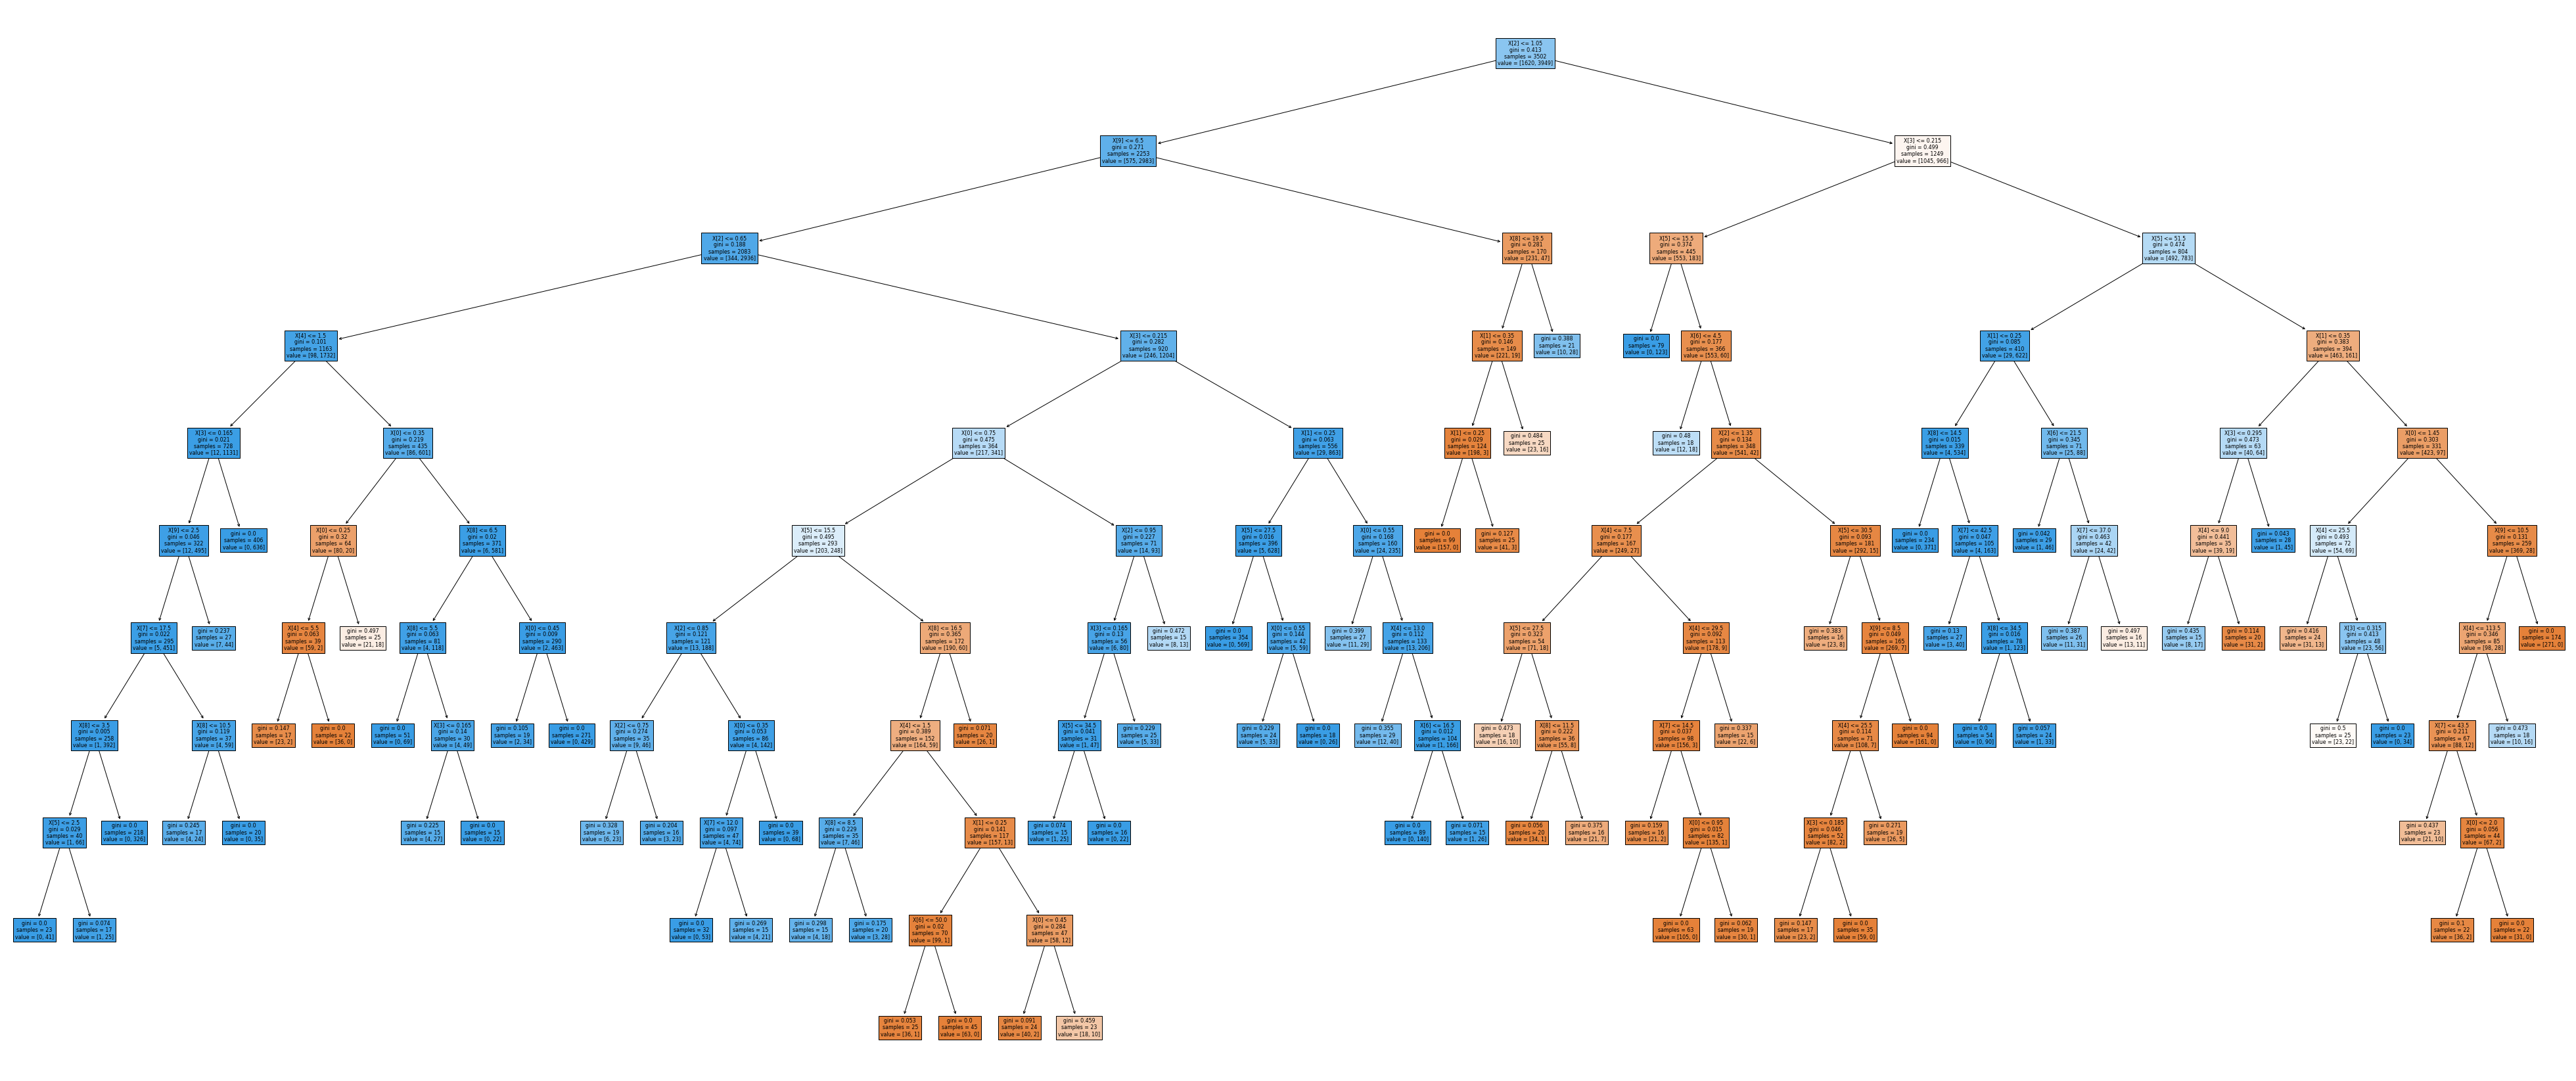

In [564]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

As per the score,RandomForest has Highest accuracy.RandomForest Score=0.9621126880455643

# DataSet 2013

In [565]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2013.csv")
a=a.head(10000)
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2013-11-01 01:00:00,NaN,0.6,NaN,NaN,135.0,74.0,NaN,NaN,NaN,7.0,NaN,NaN,28079004
1,2013-11-01 01:00:00,1.5,0.5,1.3,NaN,71.0,83.0,2.0,23.0,16.0,12.0,NaN,8.3,28079008
2,2013-11-01 01:00:00,3.9,NaN,2.8,NaN,49.0,70.0,NaN,NaN,NaN,NaN,NaN,9.0,28079011
3,2013-11-01 01:00:00,NaN,0.5,NaN,NaN,82.0,87.0,3.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2013-11-01 01:00:00,NaN,NaN,NaN,NaN,242.0,111.0,2.0,NaN,NaN,12.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2013-11-18 09:00:00,NaN,0.7,NaN,NaN,93.0,57.0,4.0,NaN,NaN,NaN,NaN,NaN,28079039
9996,2013-11-18 09:00:00,NaN,NaN,NaN,NaN,138.0,69.0,NaN,23.0,NaN,6.0,NaN,NaN,28079040
9997,2013-11-18 09:00:00,NaN,NaN,NaN,NaN,168.0,64.0,NaN,22.0,15.0,NaN,NaN,NaN,28079047
9998,2013-11-18 09:00:00,NaN,NaN,NaN,NaN,110.0,89.0,NaN,22.0,16.0,NaN,NaN,NaN,28079048


In [566]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     10000 non-null  object 
 1   BEN      2052 non-null   float64
 2   CO       4162 non-null   float64
 3   EBE      2051 non-null   float64
 4   NMHC     1231 non-null   float64
 5   NO       9977 non-null   float64
 6   NO_2     9977 non-null   float64
 7   O_3      5816 non-null   float64
 8   PM10     4995 non-null   float64
 9   PM25     2499 non-null   float64
 10  SO_2     4166 non-null   float64
 11  TCH      1231 non-null   float64
 12  TOL      2046 non-null   float64
 13  station  10000 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [568]:
b=a.fillna(value=20)
b

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2013-11-01 01:00:00,20.0,0.6,20.0,20.0,135.0,74.0,20.0,20.0,20.0,7.0,20.0,20.0,28079004
1,2013-11-01 01:00:00,1.5,0.5,1.3,20.0,71.0,83.0,2.0,23.0,16.0,12.0,20.0,8.3,28079008
2,2013-11-01 01:00:00,3.9,20.0,2.8,20.0,49.0,70.0,20.0,20.0,20.0,20.0,20.0,9.0,28079011
3,2013-11-01 01:00:00,20.0,0.5,20.0,20.0,82.0,87.0,3.0,20.0,20.0,20.0,20.0,20.0,28079016
4,2013-11-01 01:00:00,20.0,20.0,20.0,20.0,242.0,111.0,2.0,20.0,20.0,12.0,20.0,20.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2013-11-18 09:00:00,20.0,0.7,20.0,20.0,93.0,57.0,4.0,20.0,20.0,20.0,20.0,20.0,28079039
9996,2013-11-18 09:00:00,20.0,20.0,20.0,20.0,138.0,69.0,20.0,23.0,20.0,6.0,20.0,20.0,28079040
9997,2013-11-18 09:00:00,20.0,20.0,20.0,20.0,168.0,64.0,20.0,22.0,15.0,20.0,20.0,20.0,28079047
9998,2013-11-18 09:00:00,20.0,20.0,20.0,20.0,110.0,89.0,20.0,22.0,16.0,20.0,20.0,20.0,28079048


In [569]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     10000 non-null  object 
 1   BEN      10000 non-null  float64
 2   CO       10000 non-null  float64
 3   EBE      10000 non-null  float64
 4   NMHC     10000 non-null  float64
 5   NO       10000 non-null  float64
 6   NO_2     10000 non-null  float64
 7   O_3      10000 non-null  float64
 8   PM10     10000 non-null  float64
 9   PM25     10000 non-null  float64
 10  SO_2     10000 non-null  float64
 11  TCH      10000 non-null  float64
 12  TOL      10000 non-null  float64
 13  station  10000 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [570]:
x=b.iloc[:,1:9]
y=b.iloc[:,-1]

In [571]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [572]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [573]:
print(lr.intercept_)

28079016.802968718


In [574]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-6.678180
CO,0.792963
EBE,7.481548
NMHC,0.187701
NO,0.021176
NO_2,0.030558
O_3,0.039728
PM10,-0.416457


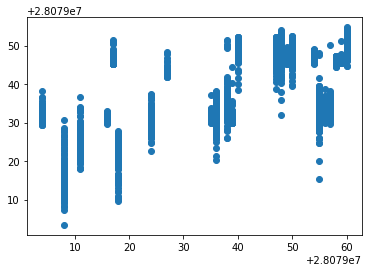

In [575]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [576]:
# Score

print(lr.score(x_test,y_test))

0.3412233673551348


In [577]:
print(lr.score(x_train,y_train))

0.341049117146734


In [578]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [579]:
#Ridge Score
rr.score(x_test,y_test)

0.3408805667492645

In [580]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [581]:
# Lasso Score
la.score(x_test,y_test)

0.2856178284203238

In [582]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [583]:
print(en.coef_)

[-0.          0.74828549  0.81412442  0.14404478  0.0271682   0.01136077
  0.03889504 -0.45100405]


In [584]:
print(en.intercept_)

28079019.02391068


In [585]:
print(en.predict(x_test))

[28079046.91164785 28079022.66904872 28079046.36985587 ...
 28079049.65299798 28079030.59415725 28079032.16296045]


In [586]:
print(en.score(x_test,y_test))

0.31254719618566773


In [587]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [588]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [590]:
observation=[[45,52,87,12,45,48,23,90]]
prediction=logr.predict(observation)

In [591]:
print(prediction)

[28079054]


In [592]:
logr.classes_

array([28079004, 28079008, 28079011, 28079016, 28079017, 28079018,
       28079024, 28079027, 28079035, 28079036, 28079038, 28079039,
       28079040, 28079047, 28079048, 28079049, 28079050, 28079054,
       28079055, 28079056, 28079057, 28079058, 28079059, 28079060],
      dtype=int64)

In [593]:
logr.predict_proba(observation)[0][0]

1.062697264092676e-136

In [594]:
print(logr.score(x_test,y_test))

0.05


In [595]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [596]:
parameters={'max_depth':[67,89,41,36,54],
           'min_samples_leaf':[5,10,13,20,45],
           'n_estimators':[12,70,36,42,56]}

In [597]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [67, 89, 41, 36, 54],
                         'min_samples_leaf': [5, 10, 13, 20, 45],
                         'n_estimators': [12, 70, 36, 42, 56]},
             scoring='accuracy')

In [598]:
grid_search.best_score_

0.6705714285714286

In [599]:
rfc_best=grid_search.best_estimator_

[Text(2176.78125, 1572.5571428571427, 'X[2] <= 12.5\ngini = 0.958\nsamples = 4417\nvalue = [256, 273, 293, 306, 294, 285, 281, 290, 313, 288\n301, 275, 316, 304, 252, 310, 294, 300, 299, 292\n288, 257, 330, 303]'),
 Text(2111.6812499999996, 1456.0714285714284, 'X[3] <= 10.22\ngini = 0.8\nsamples = 913\nvalue = [0, 271, 291, 0, 0, 284, 0, 0, 0, 0, 291, 0, 0\n0, 0, 0, 0, 0, 296, 0, 0, 0, 0, 0]'),
 Text(2046.5812499999997, 1339.5857142857142, 'gini = 0.0\nsamples = 182\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 295, 0, 0, 0, 0, 0]'),
 Text(2176.78125, 1339.5857142857142, 'X[0] <= 0.85\ngini = 0.75\nsamples = 731\nvalue = [0, 271, 291, 0, 0, 284, 0, 0, 0, 0, 291, 0, 0\n0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(1375.2375, 1223.1, 'X[4] <= 8.5\ngini = 0.689\nsamples = 468\nvalue = [0, 216, 35, 0, 0, 277, 0, 0, 0, 0, 198, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(585.9, 1106.6142857142856, 'X[2] <= 0.65\ngini = 0.574\nsamples = 193\nvalue = [0, 28, 35, 0, 0, 177, 0,

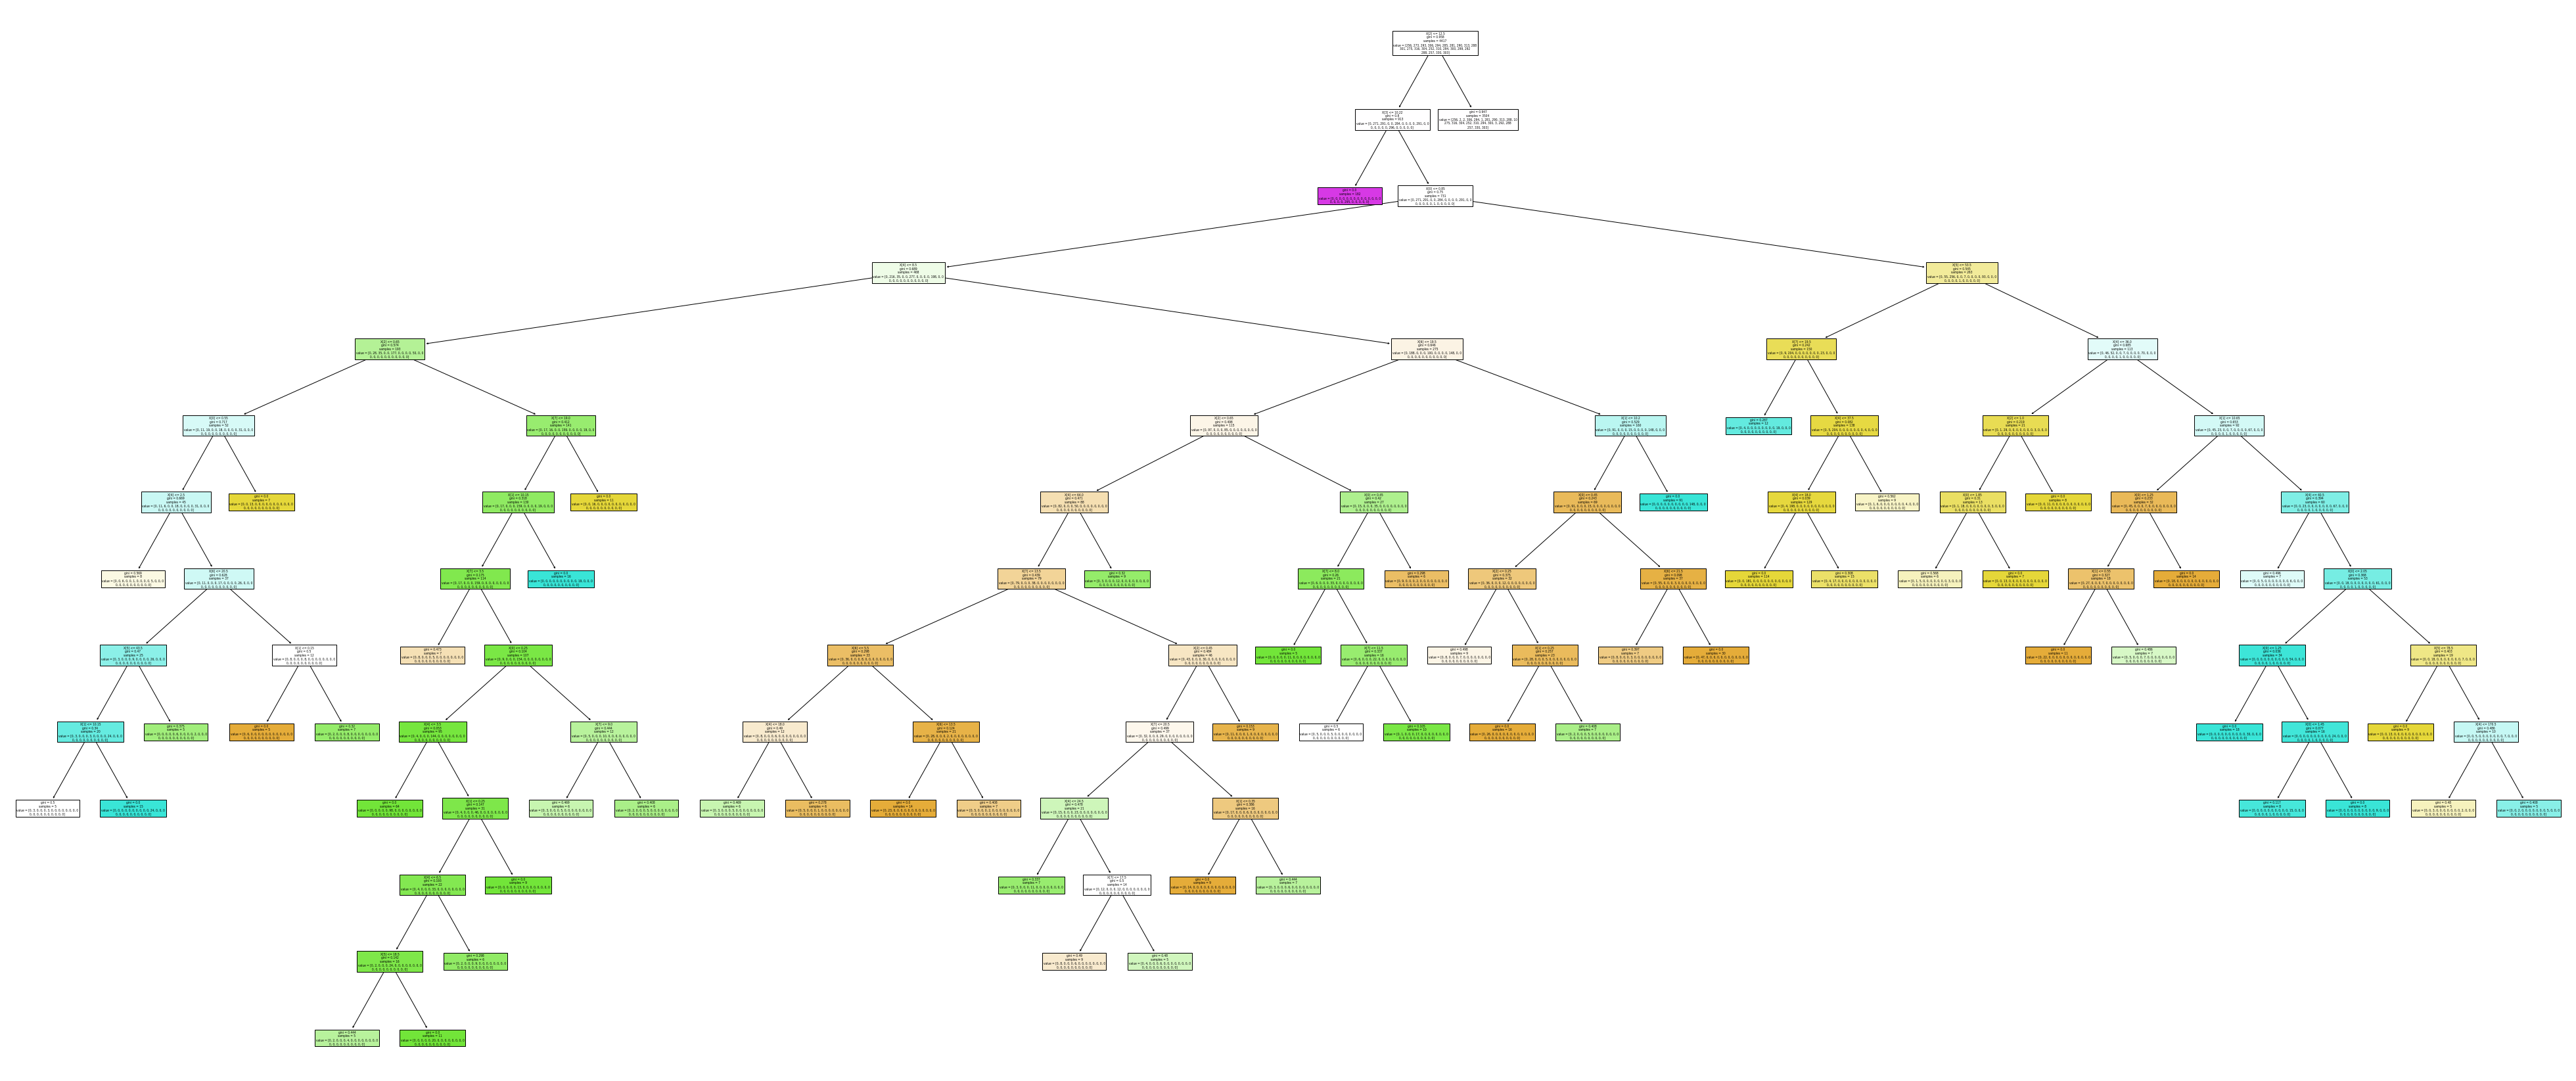

In [600]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.6705714285714286

# DataSet 2014

In [601]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2014.csv")
a=a.head(50000)
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2014-06-01 01:00:00,NaN,0.2,NaN,NaN,3.0,10.0,NaN,NaN,NaN,3.0,NaN,NaN,28079004
1,2014-06-01 01:00:00,0.2,0.2,0.1,0.11,3.0,17.0,68.0,10.0,5.0,5.0,1.36,1.3,28079008
2,2014-06-01 01:00:00,0.3,NaN,0.1,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,1.1,28079011
3,2014-06-01 01:00:00,NaN,0.2,NaN,NaN,1.0,6.0,79.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2014-06-01 01:00:00,NaN,NaN,NaN,NaN,1.0,6.0,75.0,NaN,NaN,4.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2014-04-27 20:00:00,NaN,0.2,NaN,NaN,2.0,15.0,80.0,NaN,NaN,NaN,NaN,NaN,28079016
49996,2014-04-27 20:00:00,NaN,NaN,NaN,NaN,3.0,15.0,72.0,NaN,NaN,4.0,NaN,NaN,28079017
49997,2014-04-27 20:00:00,0.1,0.5,0.1,NaN,1.0,12.0,99.0,14.0,NaN,1.0,NaN,0.4,28079018
49998,2014-04-27 20:00:00,0.1,0.2,0.1,0.25,1.0,1.0,92.0,22.0,7.0,3.0,1.30,0.1,28079024


In [602]:
b=a.dropna()
b

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
1,2014-06-01 01:00:00,0.2,0.2,0.1,0.11,3.0,17.0,68.0,10.0,5.0,5.0,1.36,1.3,28079008
6,2014-06-01 01:00:00,0.1,0.2,0.1,0.23,1.0,5.0,80.0,4.0,3.0,2.0,1.21,0.1,28079024
25,2014-06-01 02:00:00,0.2,0.2,0.1,0.11,4.0,21.0,63.0,9.0,6.0,5.0,1.36,0.8,28079008
30,2014-06-01 02:00:00,0.2,0.2,0.1,0.23,1.0,4.0,88.0,7.0,5.0,2.0,1.21,0.1,28079024
49,2014-06-01 03:00:00,0.1,0.2,0.1,0.11,4.0,18.0,66.0,9.0,7.0,6.0,1.36,0.9,28079008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49950,2014-04-27 18:00:00,0.1,0.2,0.1,0.25,1.0,1.0,95.0,17.0,6.0,3.0,1.30,0.1,28079024
49969,2014-04-27 19:00:00,0.4,0.3,0.1,0.14,9.0,27.0,75.0,26.0,9.0,5.0,1.33,1.4,28079008
49974,2014-04-27 19:00:00,0.1,0.2,0.1,0.25,1.0,1.0,94.0,24.0,7.0,3.0,1.30,0.1,28079024
49993,2014-04-27 20:00:00,0.3,0.3,0.1,0.13,5.0,23.0,74.0,16.0,8.0,6.0,1.33,1.0,28079008


In [603]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3884 entries, 1 to 49998
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     3884 non-null   object 
 1   BEN      3884 non-null   float64
 2   CO       3884 non-null   float64
 3   EBE      3884 non-null   float64
 4   NMHC     3884 non-null   float64
 5   NO       3884 non-null   float64
 6   NO_2     3884 non-null   float64
 7   O_3      3884 non-null   float64
 8   PM10     3884 non-null   float64
 9   PM25     3884 non-null   float64
 10  SO_2     3884 non-null   float64
 11  TCH      3884 non-null   float64
 12  TOL      3884 non-null   float64
 13  station  3884 non-null   int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 455.2+ KB


In [604]:
x=b.iloc[:,1:4]
y=b.iloc[:,-1]

In [605]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [606]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [607]:
print(lr.intercept_)

28079023.45261774


In [608]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,-11.915404
CO,-18.071556
EBE,6.247854


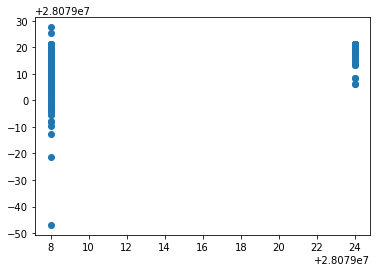

In [609]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [610]:
# Score

print(lr.score(x_test,y_test))

0.28083721770308157


In [611]:
print(lr.score(x_train,y_train))

0.3124798523254694


In [612]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [613]:
#Ridge Score
rr.score(x_test,y_test)

0.28094474445439055

In [614]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [615]:
# Lasso Score
la.score(x_test,y_test)

-0.0003286103697399678

In [616]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [617]:
print(en.coef_)

[-1.25615553 -0.01808443 -0.59155669]


In [618]:
print(en.intercept_)

28079016.44254979


In [619]:
print(en.predict(x_test))

[28079016.12854613 28079015.08457025 28079016.00112212 ...
 28079014.94984205 28079015.94196645 28079014.82060958]


In [620]:
print(en.score(x_test,y_test))

0.06548254153534883


In [621]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [622]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [624]:
observation=[[65,72,64]]
prediction=logr.predict(observation)

In [625]:
print(prediction)

[28079008]


In [626]:
logr.classes_

array([28079008, 28079024], dtype=int64)

In [627]:
logr.predict_proba(observation)[0][0]

1.0

In [628]:
print(logr.score(x_test,y_test))

0.5171526586620926


In [629]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [630]:
parameters={'max_depth':[1,2,3,5,8],
           'min_samples_leaf':[6,5,7,9,8],
           'n_estimators':[30,20,50,60,80]}

In [631]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5, 8],
                         'min_samples_leaf': [6, 5, 7, 9, 8],
                         'n_estimators': [30, 20, 50, 60, 80]},
             scoring='accuracy')

In [632]:
grid_search.best_score_

0.8910963944076526

In [633]:
rfc_best=grid_search.best_estimator_

[Text(2593.828125, 1494.8999999999999, 'X[2] <= 0.15\ngini = 0.5\nsamples = 1728\nvalue = [1357, 1361]'),
 Text(1769.90625, 1223.1, 'X[1] <= 0.25\ngini = 0.381\nsamples = 1123\nvalue = [453, 1314]'),
 Text(976.5, 951.3, 'X[1] <= 0.15\ngini = 0.255\nsamples = 887\nvalue = [208, 1181]'),
 Text(488.25, 679.4999999999999, 'X[0] <= 0.25\ngini = 0.442\nsamples = 140\nvalue = [72, 146]'),
 Text(244.125, 407.6999999999998, 'X[0] <= 0.15\ngini = 0.36\nsamples = 118\nvalue = [43, 140]'),
 Text(122.0625, 135.89999999999986, 'gini = 0.184\nsamples = 29\nvalue = [4, 35]'),
 Text(366.1875, 135.89999999999986, 'gini = 0.395\nsamples = 89\nvalue = [39, 105]'),
 Text(732.375, 407.6999999999998, 'X[0] <= 0.35\ngini = 0.284\nsamples = 22\nvalue = [29, 6]'),
 Text(610.3125, 135.89999999999986, 'gini = 0.083\nsamples = 14\nvalue = [22, 1]'),
 Text(854.4375, 135.89999999999986, 'gini = 0.486\nsamples = 8\nvalue = [7, 5]'),
 Text(1464.75, 679.4999999999999, 'X[0] <= 0.25\ngini = 0.205\nsamples = 747\nvalue =

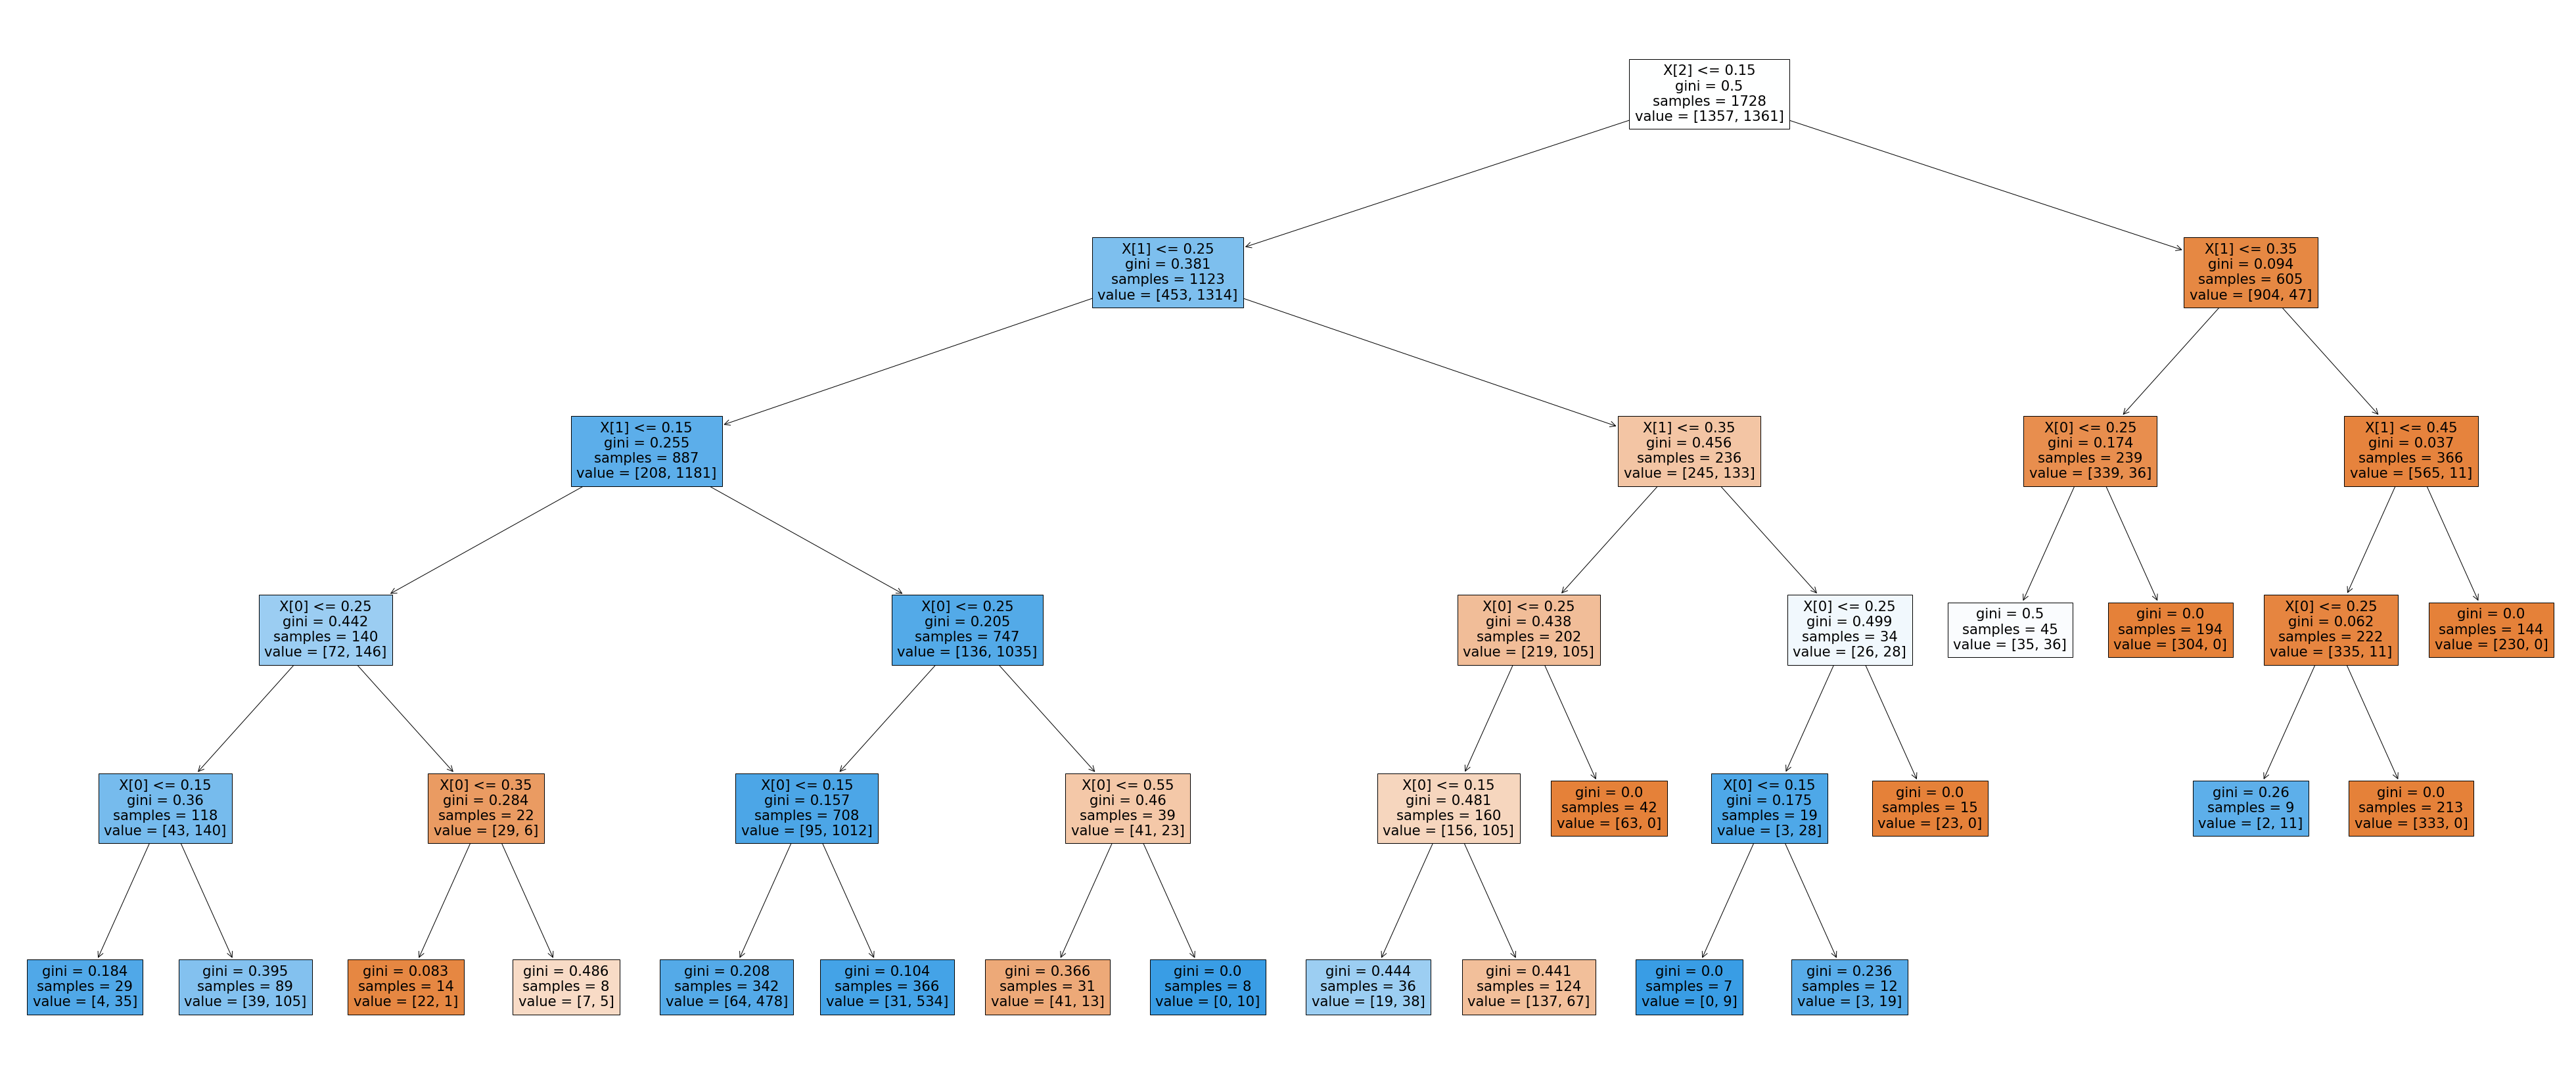

In [634]:
plt.figure(figsize=(70,30))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.8910963944076526

# DataSet 2015

In [635]:
a=pd.read_csv(r"E:\Python Data Science\Documents\csvs_per_year\csvs_per_year\madrid_2015.csv")
a=a.head(100000)
a

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2015-10-01 01:00:00,NaN,0.8,NaN,NaN,90.0,82.0,NaN,NaN,NaN,10.0,NaN,NaN,28079004
1,2015-10-01 01:00:00,2.0,0.8,1.6,0.33,40.0,95.0,4.0,37.0,24.0,12.0,1.83,8.3,28079008
2,2015-10-01 01:00:00,3.1,NaN,1.8,NaN,29.0,97.0,NaN,NaN,NaN,NaN,NaN,7.1,28079011
3,2015-10-01 01:00:00,NaN,0.6,NaN,NaN,30.0,103.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2015-10-01 01:00:00,NaN,NaN,NaN,NaN,95.0,96.0,2.0,NaN,NaN,9.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2015-05-22 15:00:00,NaN,0.2,NaN,NaN,5.0,14.0,97.0,NaN,NaN,NaN,NaN,NaN,28079039
99996,2015-05-22 15:00:00,NaN,NaN,NaN,NaN,2.0,10.0,NaN,11.0,NaN,4.0,NaN,NaN,28079040
99997,2015-05-22 15:00:00,NaN,NaN,NaN,NaN,2.0,15.0,NaN,13.0,5.0,NaN,NaN,NaN,28079047
99998,2015-05-22 15:00:00,NaN,NaN,NaN,NaN,2.0,13.0,NaN,18.0,8.0,NaN,NaN,NaN,28079048


In [457]:
b=a.dropna()
b

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PM25,PXY,SO_2,TCH,TOL,station
11,2010-03-01 01:00:00,0.78,0.18,0.84,0.73,0.28,10.420000,11.900000,1.00,90.309998,18.370001,11.30,0.81,9.40,1.55,1.99,28079024
23,2010-03-01 01:00:00,0.70,0.23,1.00,0.73,0.18,17.820000,22.290001,1.00,70.550003,23.639999,13.15,0.81,9.76,1.48,2.62,28079099
35,2010-03-01 02:00:00,0.58,0.17,0.84,0.73,0.28,3.500000,4.950000,1.00,68.849998,5.600000,5.25,0.81,8.56,1.54,0.84,28079024
47,2010-03-01 02:00:00,0.33,0.21,0.84,0.73,0.17,10.810000,14.900000,1.00,74.750000,7.890000,5.54,0.81,8.82,1.44,1.21,28079099
59,2010-03-01 03:00:00,0.38,0.16,0.64,1.00,0.26,2.750000,4.200000,1.00,93.629997,5.130000,4.90,0.79,8.56,1.54,0.49,28079024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,2010-04-25 11:00:00,0.45,0.29,0.88,1.00,0.25,31.469999,44.400002,0.48,51.180000,17.910000,7.00,0.60,12.47,1.46,1.87,28079024
99959,2010-04-25 11:00:00,0.31,0.32,0.48,1.00,0.16,30.410000,43.360001,0.48,51.169998,20.420000,11.19,0.60,10.09,1.44,2.14,28079099
99971,2010-04-25 12:00:00,0.49,0.26,0.98,1.00,0.27,26.709999,34.840000,0.37,82.220001,16.670000,6.79,0.72,12.71,1.39,1.95,28079024
99983,2010-04-25 12:00:00,0.38,0.31,0.48,1.00,0.15,25.440001,35.189999,0.37,64.959999,16.350000,10.80,0.72,10.04,1.41,1.86,28079099


In [458]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5025 entries, 11 to 99995
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     5025 non-null   object 
 1   BEN      5025 non-null   float64
 2   CO       5025 non-null   float64
 3   EBE      5025 non-null   float64
 4   MXY      5025 non-null   float64
 5   NMHC     5025 non-null   float64
 6   NO_2     5025 non-null   float64
 7   NOx      5025 non-null   float64
 8   OXY      5025 non-null   float64
 9   O_3      5025 non-null   float64
 10  PM10     5025 non-null   float64
 11  PM25     5025 non-null   float64
 12  PXY      5025 non-null   float64
 13  SO_2     5025 non-null   float64
 14  TCH      5025 non-null   float64
 15  TOL      5025 non-null   float64
 16  station  5025 non-null   int64  
dtypes: float64(15), int64(1), object(1)
memory usage: 706.6+ KB


In [459]:
x=b.iloc[:,1:9]
y=b.iloc[:,-1]

In [460]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [461]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [462]:
print(lr.intercept_)

28079024.235665835


In [463]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff


,Co-efficient
BEN,-27.197744
CO,154.015598
EBE,40.449137
MXY,-10.550442
NMHC,-76.571095
NO_2,0.143705
NOx,-0.317495
OXY,11.264215


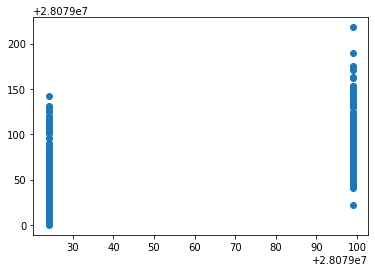

In [464]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [465]:
# Score

print(lr.score(x_test,y_test))

0.36491899807648887


In [466]:
print(lr.score(x_train,y_train))

0.40763179780141545


In [467]:
#Ridge fitting
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [468]:
#Ridge Score
rr.score(x_test,y_test)

0.37206898348607753

In [469]:
# Lasso Fitting
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [470]:
# Lasso Score
la.score(x_test,y_test)

0.08611307625988662

In [471]:
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [472]:
print(en.coef_)

[ 0.5149399   0.52951461  8.9746094  -1.43515171 -1.03767562 -0.15720093
  0.25861891  0.        ]


In [473]:
print(en.intercept_)

28079047.07141018


In [474]:
print(en.predict(x_test))

[28079091.6630704  28079051.05754229 28079055.72267235 ...
 28079065.56148108 28079057.74130636 28079057.8801536 ]


In [475]:
print(en.score(x_test,y_test))

0.16571546760663525


In [476]:
# Logistic Regression
fs=StandardScaler().fit_transform(x)

In [477]:
logr=LogisticRegression(max_iter=10000)
logr.fit(fs,y)

LogisticRegression(max_iter=10000)

In [479]:
observation=[[12,54,67,78,45,90,28,69]]
prediction=logr.predict(observation)

In [480]:
print(prediction)

[28079099]


In [481]:
logr.classes_

array([28079024, 28079099], dtype=int64)

In [482]:
logr.predict_proba(observation)[0][0]

0.0

In [483]:
print(logr.score(x_test,y_test))

0.47480106100795755


In [484]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [485]:
parameters={'max_depth':[1,98,3,78,53],
           'min_samples_leaf':[5,10,13,32,45],
           'n_estimators':[61,65,69,67,65]}

In [486]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 98, 3, 78, 53],
                         'min_samples_leaf': [5, 10, 13, 32, 45],
                         'n_estimators': [61, 65, 69, 67, 65]},
             scoring='accuracy')

In [487]:
grid_search.best_score_

0.9556438495085571

In [488]:
rfc_best=grid_search.best_estimator_

[Text(2172.5688202247193, 2613.4615384615386, 'X[1] <= 0.255\ngini = 0.5\nsamples = 2272\nvalue = [1755, 1762]'),
 Text(688.0955056179776, 2404.3846153846152, 'X[5] <= 10.485\ngini = 0.249\nsamples = 902\nvalue = [1225, 209]'),
 Text(133.75280898876406, 2195.3076923076924, 'X[6] <= 12.295\ngini = 0.058\nsamples = 288\nvalue = [452, 14]'),
 Text(66.87640449438203, 1986.2307692307693, 'X[3] <= 0.965\ngini = 0.018\nsamples = 272\nvalue = [436, 4]'),
 Text(33.438202247191015, 1777.1538461538462, 'gini = 0.0\nsamples = 55\nvalue = [83, 0]'),
 Text(100.31460674157304, 1777.1538461538462, 'X[5] <= 7.17\ngini = 0.022\nsamples = 217\nvalue = [353, 4]'),
 Text(66.87640449438203, 1568.076923076923, 'gini = 0.0\nsamples = 149\nvalue = [241, 0]'),
 Text(133.75280898876406, 1568.076923076923, 'X[1] <= 0.175\ngini = 0.067\nsamples = 68\nvalue = [112, 4]'),
 Text(66.87640449438203, 1359.0, 'X[2] <= 0.92\ngini = 0.147\nsamples = 16\nvalue = [23, 2]'),
 Text(33.438202247191015, 1149.923076923077, 'gini 

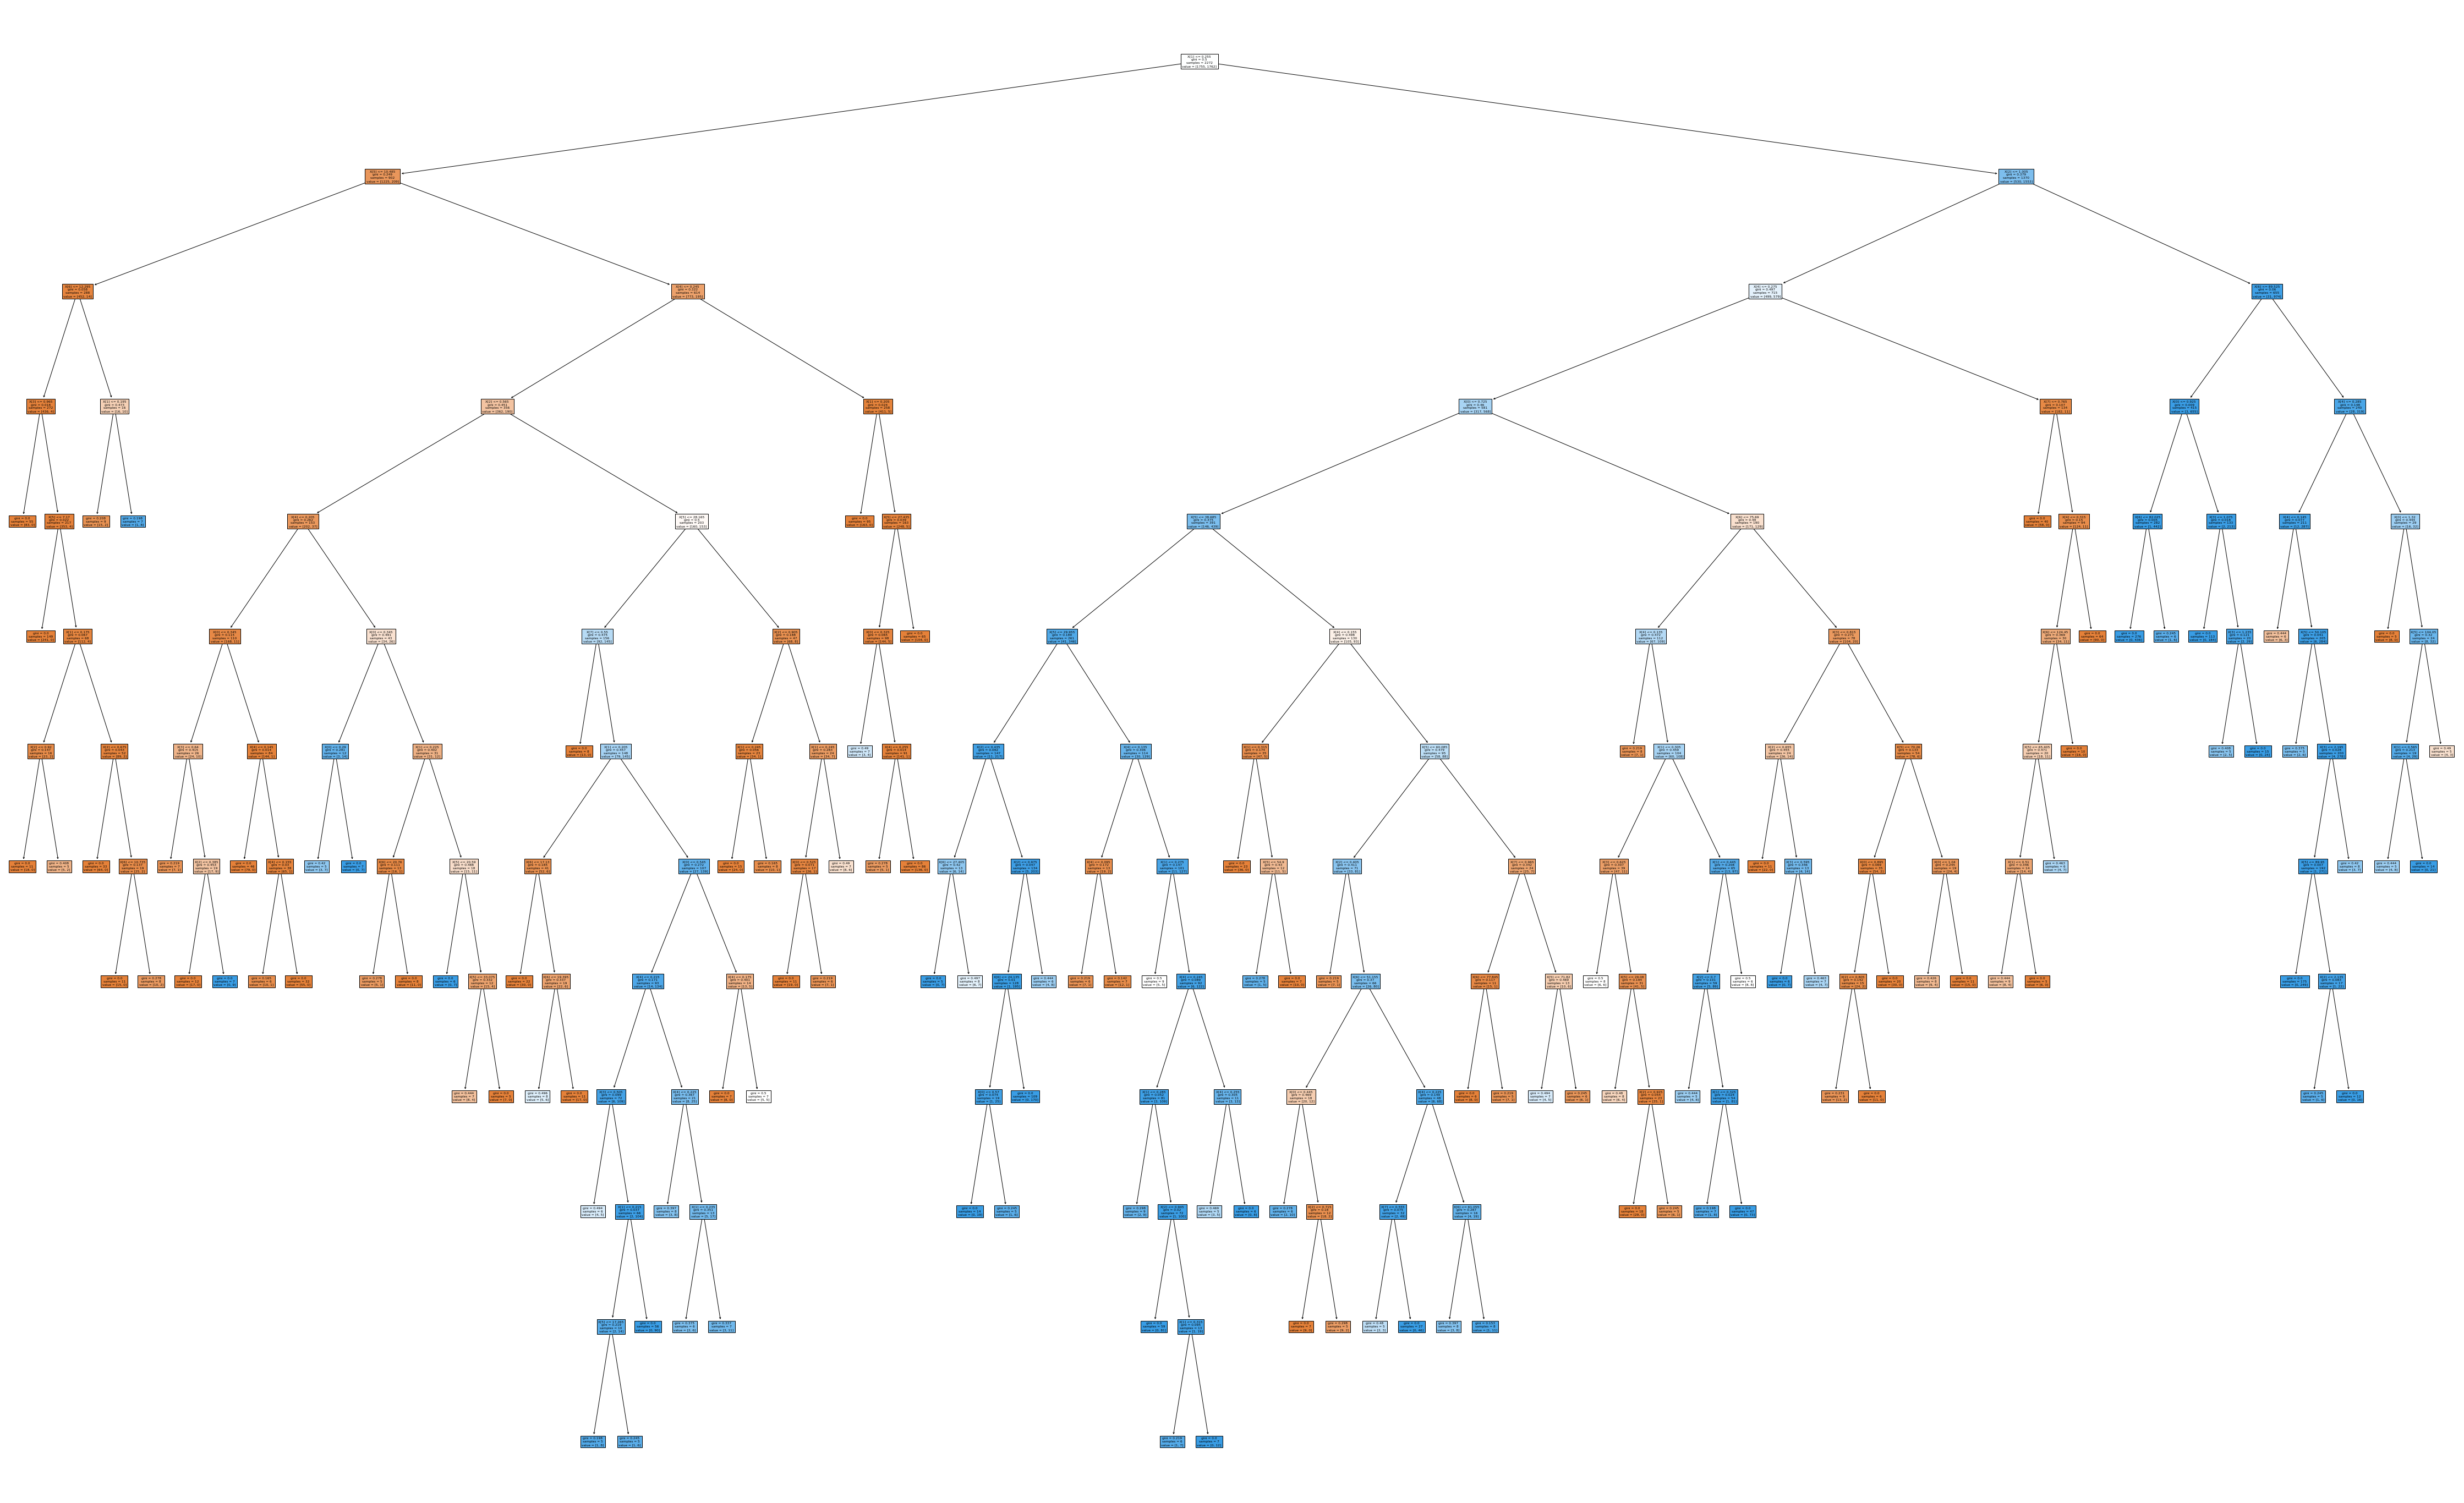

In [489]:
plt.figure(figsize=(80,50))
plot_tree(rfc_best.estimators_[5],filled=True)

Conclusion: RandomForest has highest accuracy.RandomForest Score=0.9556438495085571